In [10]:
import sys
import os

# Add the build directory to Python path
build_dir = os.path.abspath('/Users/kisel/uni/apal/Algorithm-Selector/Implementation/lib')
sys.path.insert(0, build_dir)

# Add the data directory to Python path
data_dir = os.path.abspath('/Users/kisel/uni/apal/Algorithm-Selector/Implementation/data')
sys.path.insert(0, data_dir)

import pandas as pd
from tqdm import tqdm
import numpy as np

import sorters
import probes

import list_generators as lg

In [11]:
probe_list = probes.list_probes()
sort_list = sorters.list_sorters()
sort_list, probe_list

(['insertion_sort',
  'merge_sort',
  'quick_sort',
  'spin_sort',
  'std_sort',
  'tim_sort'],
 ['dis',
  'enc',
  'exc',
  'ham',
  'inv',
  'max',
  'mono',
  'osc',
  'rem',
  'runs',
  'sus'])

In [12]:
#sizes = [1, 10, 100, 1000, 10000, 100000]
#
#dataset = []
#for size in sizes:
#    baselist = lg.generate_list(size)
#    randomlist = lg.randomize_list(baselist)
#    dataset.append(randomlist)

In [13]:
data = pd.read_feather("/Users/kisel/uni/apal/Algorithm-Selector/Implementation/data/out.feather")
data = data.head(5000)
dataset = data["data"].tolist()

In [14]:
#data = pd.read_feather("/Users/kisel/uni/apal/Algorithm-Selector/Implementation/data/large_data.feather")
#dataset = data["large_data"].tolist()

In [15]:
probe_times = {}
sort_times = {}

for arr in tqdm(dataset):
    for probe in probe_list:
        t = probes.benchmark_probe_by_name(probe, arr)
        probe_times.setdefault(probe, []).append(t)
    
    for sorter in sort_list:
        t = sorters.benchmark_sorter(sorter, arr)
        sort_times.setdefault(sorter, []).append(t)

100%|██████████| 5000/5000 [00:03<00:00, 1627.52it/s]


In [16]:
# Compute average times for each probe
avg_probe_times = {}
for probe, times in probe_times.items():
    avg_probe_times[probe] = sum(times) / len(times) if times else 0

# Compute average times for each sorter
avg_sort_times = {}
for sorter, times in sort_times.items():
    avg_sort_times[sorter] = sum(times) / len(times) if times else 0

# Print out average times
print("Average probe times (ms):")
for probe, avg_time in avg_probe_times.items():
    print(f"  {probe}: {avg_time:.2f}")

print("\nAverage sorter times (ms):")
for sorter, avg_time in avg_sort_times.items():
    print(f"  {sorter}: {avg_time:.2f}")

print("\nRatio of average probe time to average sorter time:")
for probe, avg_probe in avg_probe_times.items():
    for sorter, avg_sort in avg_sort_times.items():
        ratio = avg_probe / avg_sort if avg_sort != 0 else float('inf')
        print(f"  {probe} / {sorter}: {ratio:.2f}")

Average probe times (ms):
  dis: 0.00
  enc: 0.01
  exc: 0.02
  ham: 0.01
  inv: 0.02
  max: 0.04
  mono: 0.00
  osc: 0.04
  rem: 0.01
  runs: 0.00
  sus: 0.01

Average sorter times (ms):
  insertion_sort: 0.05
  merge_sort: 0.02
  quick_sort: 0.01
  spin_sort: 0.01
  std_sort: 0.01
  tim_sort: 0.02

Ratio of average probe time to average sorter time:
  dis / insertion_sort: 0.04
  dis / merge_sort: 0.11
  dis / quick_sort: 0.13
  dis / spin_sort: 0.13
  dis / std_sort: 0.13
  dis / tim_sort: 0.07
  enc / insertion_sort: 0.18
  enc / merge_sort: 0.54
  enc / quick_sort: 0.64
  enc / spin_sort: 0.63
  enc / std_sort: 0.65
  enc / tim_sort: 0.33
  exc / insertion_sort: 0.38
  exc / merge_sort: 1.12
  exc / quick_sort: 1.33
  exc / spin_sort: 1.32
  exc / std_sort: 1.37
  exc / tim_sort: 0.70
  ham / insertion_sort: 0.13
  ham / merge_sort: 0.37
  ham / quick_sort: 0.44
  ham / spin_sort: 0.44
  ham / std_sort: 0.45
  ham / tim_sort: 0.23
  inv / insertion_sort: 0.47
  inv / merge_sort: 1

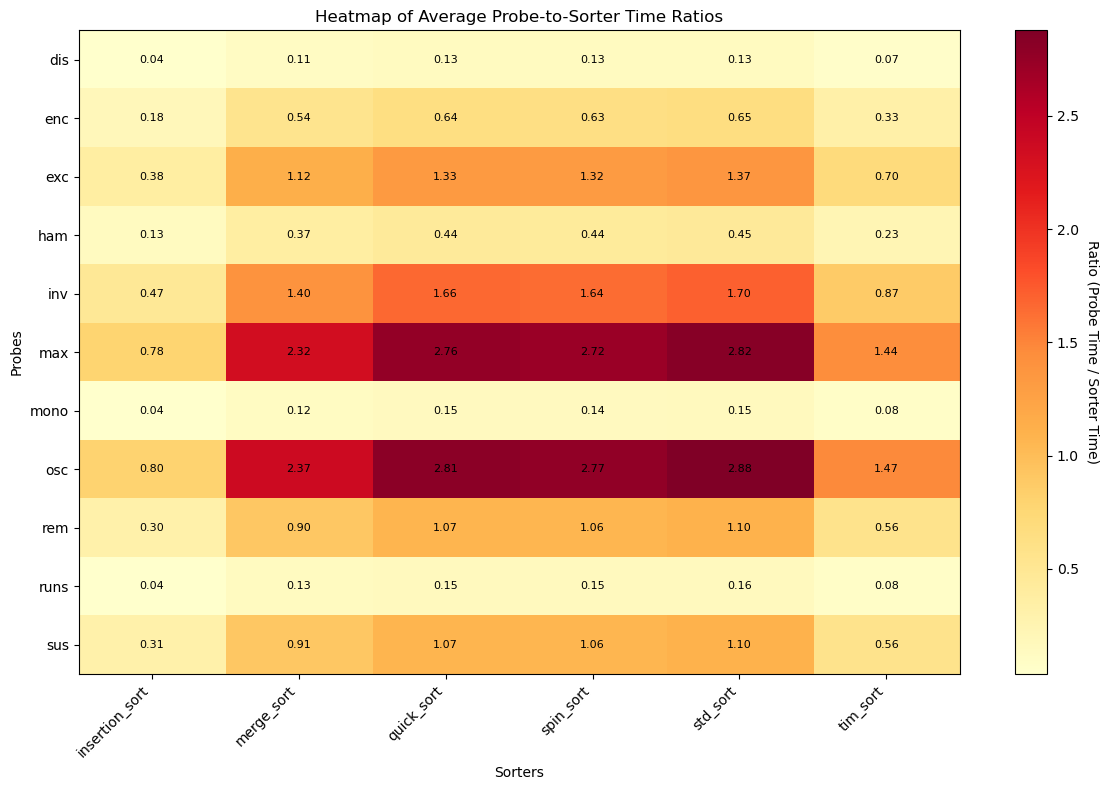

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Assume avg_probe_times and avg_sort_times have been computed earlier
probe_names = list(avg_probe_times.keys())
sorter_names = list(avg_sort_times.keys())

# Create a 2D array (matrix) of ratios:
ratio_matrix = np.array([
    [avg_probe_times[probe] / avg_sort_times[sorter] if avg_sort_times[sorter] != 0 else 0 
     for sorter in sorter_names] 
    for probe in probe_names
])

# Optionally, set a fixed color scale or compute from data:
vmin = np.nanmin(ratio_matrix)
vmax = np.nanmax(ratio_matrix)

# Set up the plot
plt.figure(figsize=(12, 8))
# Use a bright colormap such as "YlOrRd"
cmap = plt.get_cmap('YlOrRd')
im = plt.imshow(ratio_matrix, cmap=cmap, aspect='auto', interpolation='nearest', vmin=vmin, vmax=vmax)

# Add a colorbar
cbar = plt.colorbar(im)
cbar.set_label('Ratio (Probe Time / Sorter Time)', rotation=270, labelpad=15)

# Set axis tick labels
plt.xticks(ticks=np.arange(len(sorter_names)), labels=sorter_names, rotation=45, ha="right")
plt.yticks(ticks=np.arange(len(probe_names)), labels=probe_names)

plt.xlabel("Sorters")
plt.ylabel("Probes")
plt.title("Heatmap of Average Probe-to-Sorter Time Ratios")

# Annotate each cell with its ratio value for clarity
for i in range(ratio_matrix.shape[0]):
    for j in range(ratio_matrix.shape[1]):
        plt.text(j, i, f"{ratio_matrix[i, j]:.2f}", ha="center", va="center", color="black", fontsize=8)

plt.tight_layout()
plt.show()


In [18]:
# dis, mono, runs definitely usable
# enc, sus, ham and rem less so

# exc, inv, max, osc shouldnt be in runtime, too slow